In [1]:
from helper_functions import *
PLOT_PATH_MNIST_and_FashionMNIST = os.path.abspath(os.path.join(PLOT_PATH, "MNIST_and_FashionMNIST"))

In [2]:
N = 5000
data, labels = load_MNIST(N,**{"datasetPath": datasetPath})
datasetName = "MNIST"


Loading 'mnist_784' data from file
Selecting subset of N =  5000


In [ ]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(data, labels, datasetName=datasetName)

In [3]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("MNIST")

In [ ]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=True, plot_path=PLOT_PATH_MNIST_and_FashionMNIST)

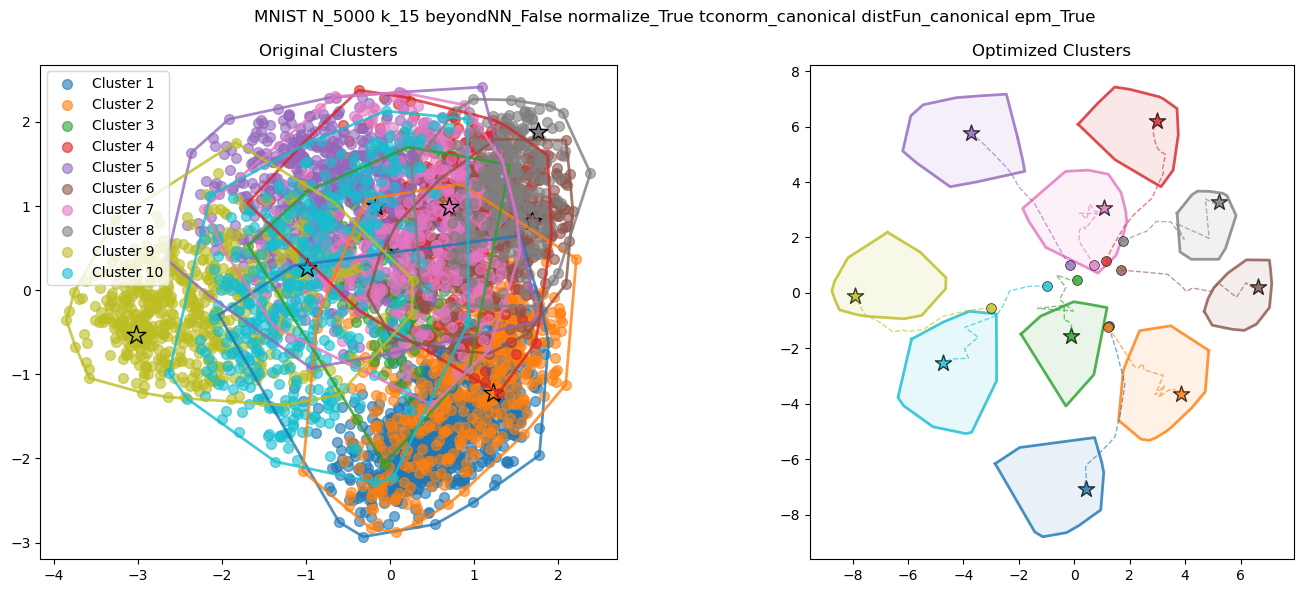

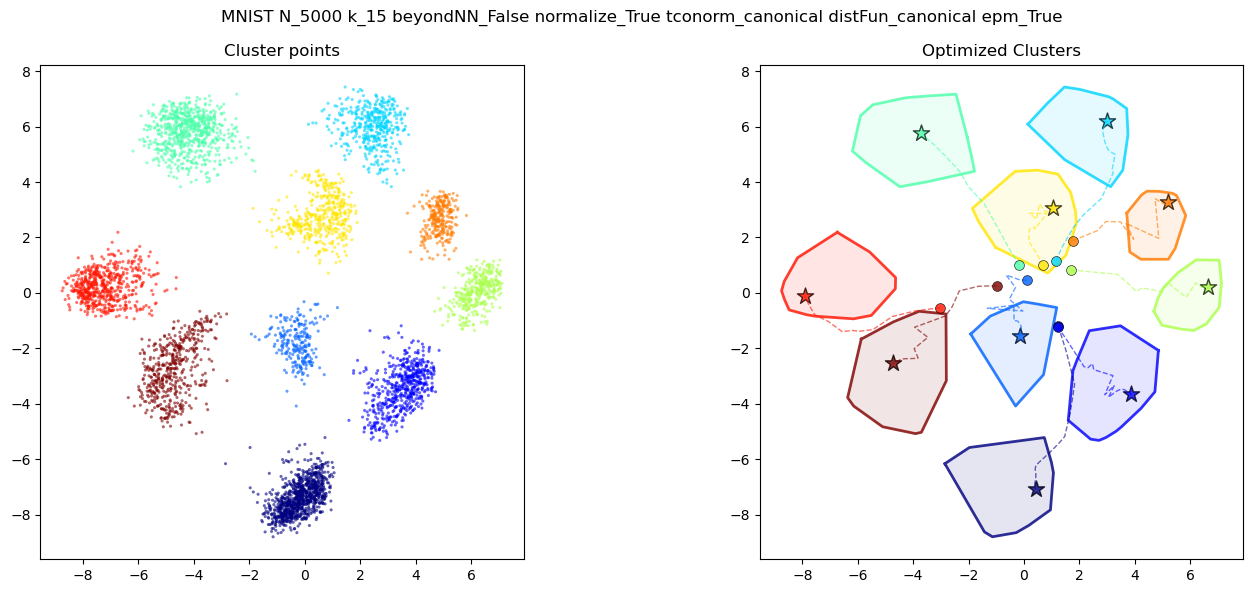

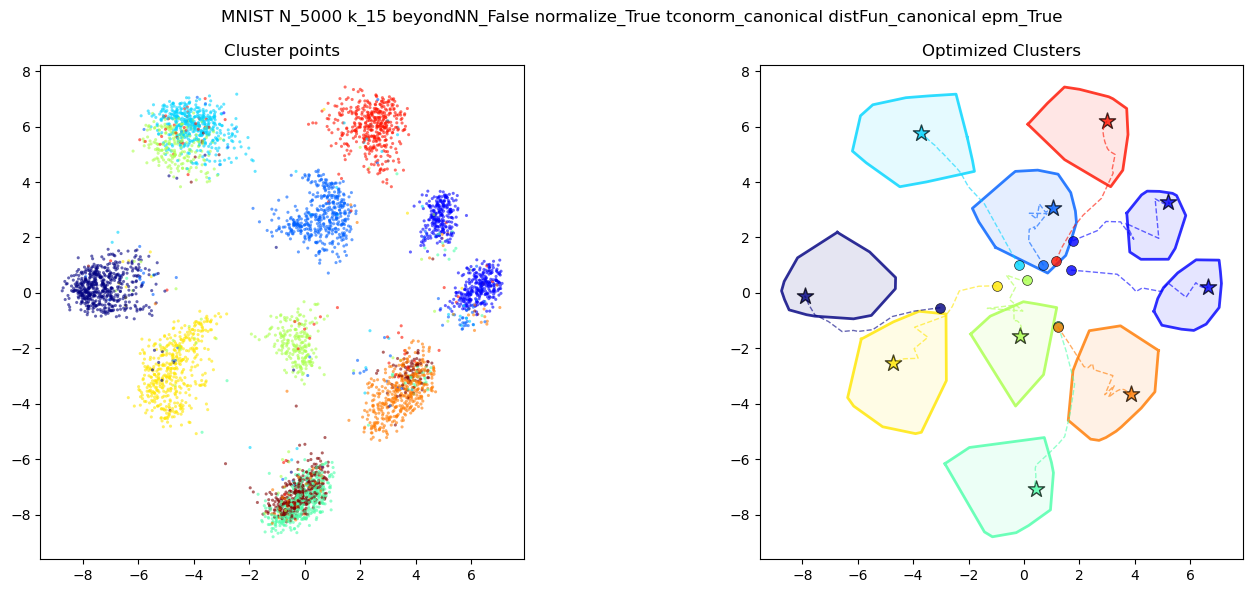

In [9]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=False, plot_path=PLOT_PATH_MNIST_and_FashionMNIST)

In [8]:
N = 5000
data, labels = load_FashionMNIST(N,**{"datasetPath": datasetPath})
datasetName = "FashionMNIST_3"


Loading 'fashion-mnist' data from file
Selecting subset of N =  5000


In [9]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(data, labels, datasetName=datasetName)

Number of CPU threads =  128

Nearest neighbours computed in: 0.73 sec

Normalization computed in: 0.02 sec
Computing the graph...

Graph computation: 0.60 sec
Applying t-conorm...

T-conorm application: 3.88 sec

Running Dijkstra...

Dijkstra: 7.46 sec
Number of clusters:  10

Performing classical MDS...

classical MDS: 0.98 sec

Starting cluster separation optimization...
Optimizing separation for 10 clusters...
Total parameters: 30
Iteration 0, Loss: 70.467033
Iteration 10, Loss: 5.888398
Iteration 20, Loss: 2.183214
Iteration 30, Loss: 0.089270
Iteration 40, Loss: 0.009832
Iteration 50, Loss: 0.004602
Iteration 60, Loss: 0.006446
Iteration 70, Loss: 0.003794
Iteration 80, Loss: 0.001836
Converged at iteration 89

Isumap total time: 64.65 sec


In [ ]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("FashionMNIST")

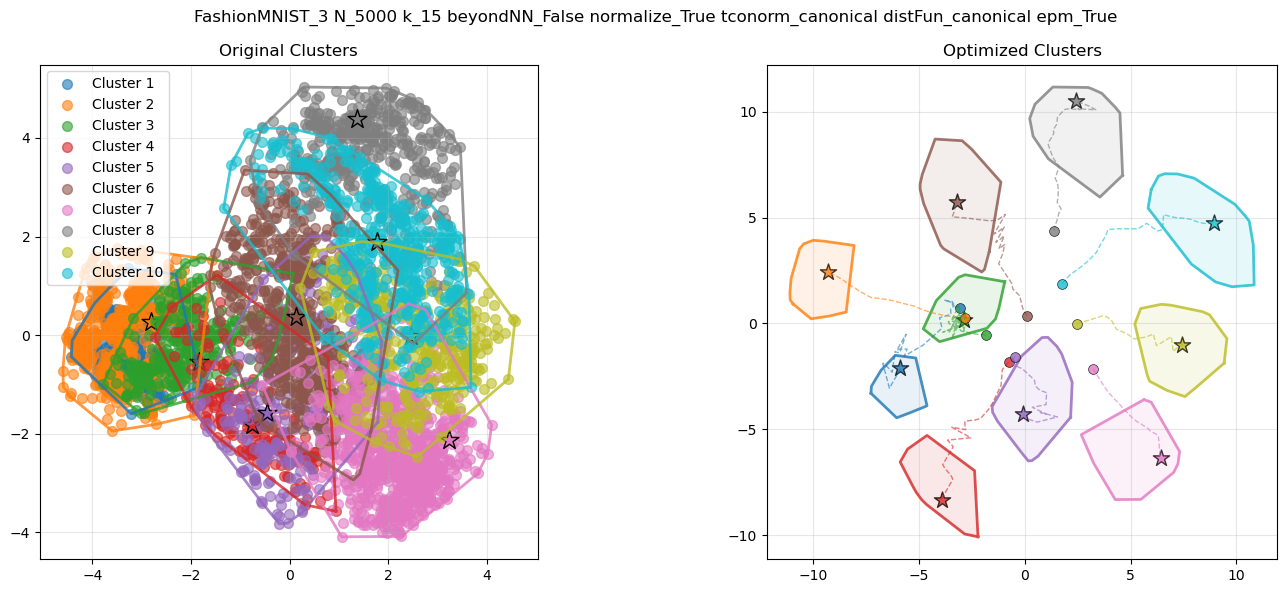

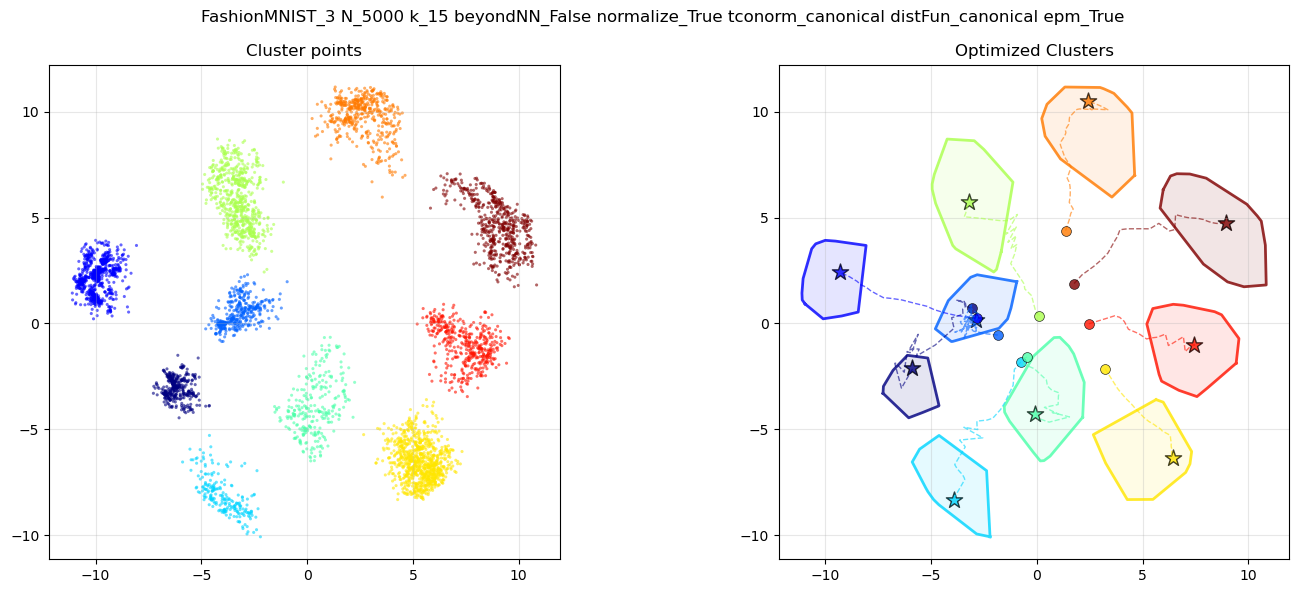

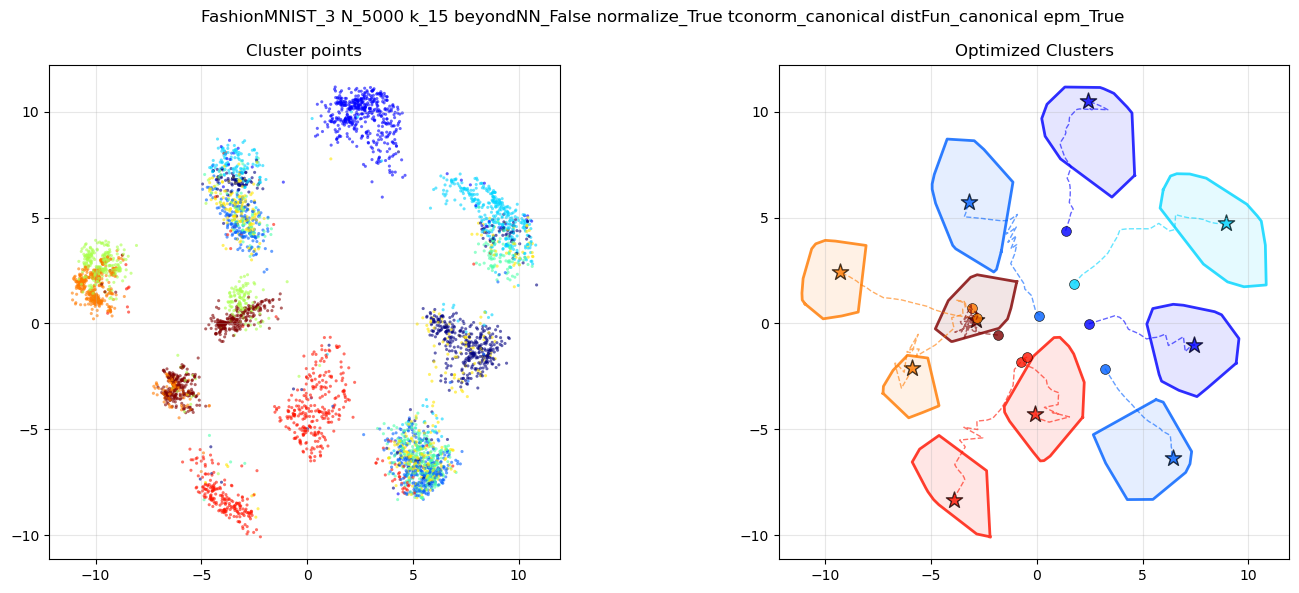

In [10]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=True)

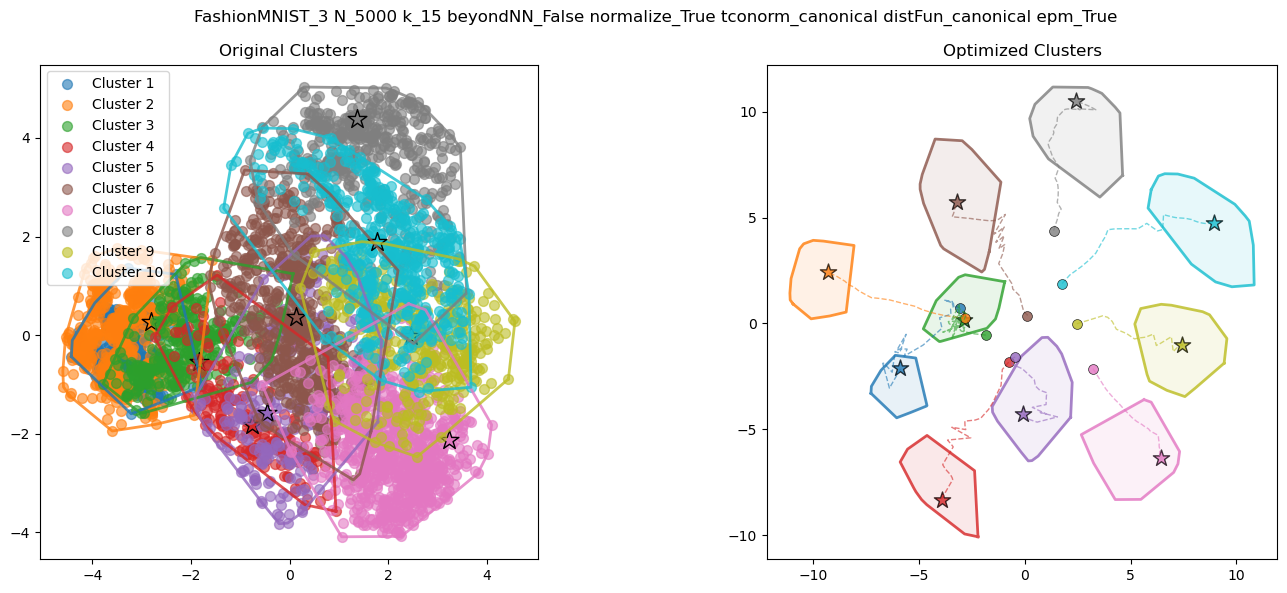

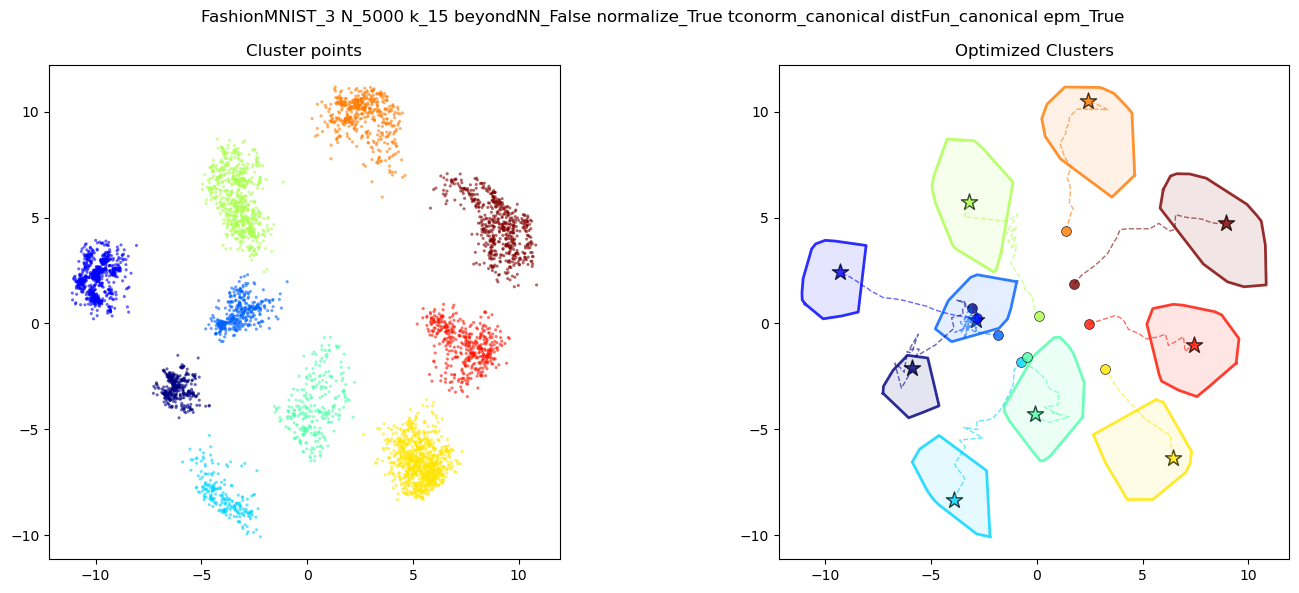

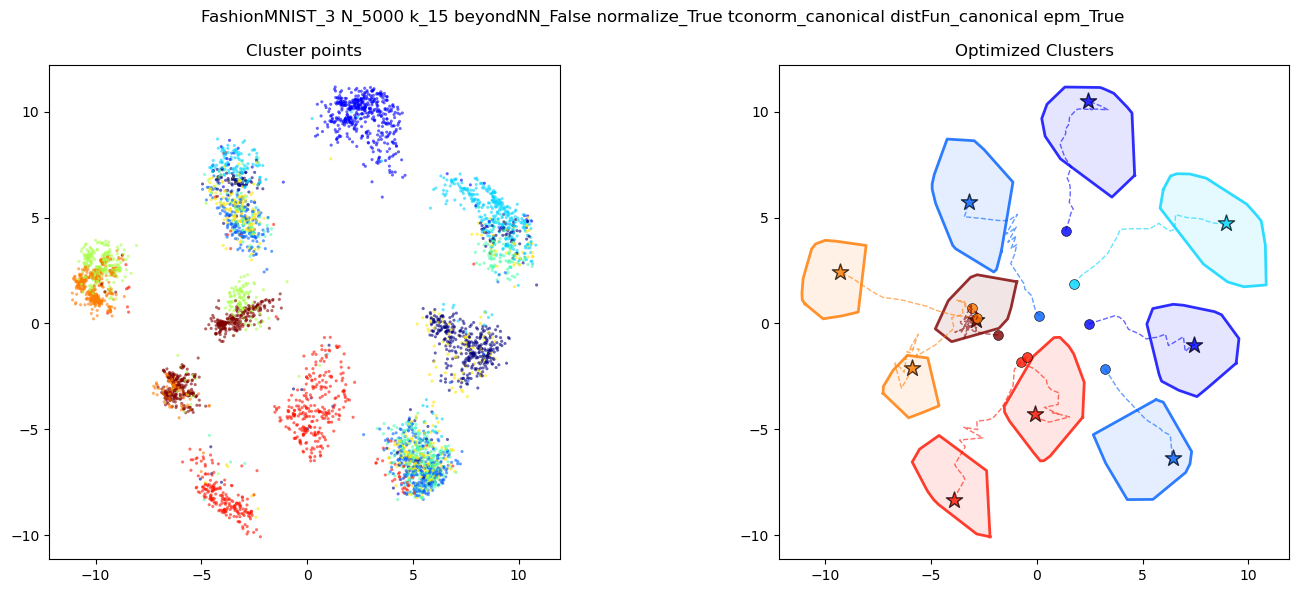

In [11]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=False)